In [59]:
#see plots in Jupyter
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#make pandas dataframe called "energy", comma as thousands separator, ":" for na_values
#specify dtype for the numeric columns (TIME and Value)
filename = "nrg_ind_334a_1_Data.csv"
energy = pd.read_csv(filename, encoding = "ISO-8859-1", thousands = ",", na_values=":", 
                 dtype={"TIME": np.int, "Value": np.float})

#see head (first rows of data frame)
energy.head(12)

,TIME,GEO,INDIC_NRG,UNIT,Value
0,2006,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1722.2
1,2006,European Union (28 countries),Primary energy consumption,"Index, 2005=100",100.5
2,2006,European Union (28 countries),Primary energy consumption,Percentage,NaN
3,2006,European Union (28 countries),Final Energy Consumption,Million tonnes of oil equivalent (TOE),1193.2
4,2006,European Union (28 countries),Final Energy Consumption,"Index, 2005=100",100.1
5,2006,European Union (28 countries),Final Energy Consumption,Percentage,NaN
6,2006,European Union (28 countries),Distance to target - Primary energy consumption,Million tonnes of oil equivalent (TOE),239.2
7,2006,European Union (28 countries),Distance to target - Primary energy consumption,"Index, 2005=100",NaN
8,2006,European Union (28 countries),Distance to target - Primary energy consumption,Percentage,16.1
9,2006,European Union (28 countries),Distance to target - Final energy consumption,Million tonnes of oil equivalent (TOE),107.2


In [60]:
#get dimensions of data frame (rows, columns)
energy.shape

(4920, 5)

In [61]:
#list data type of each column, number of non-missing values, memory usage
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 5 columns):
TIME         4920 non-null int64
GEO          4920 non-null object
INDIC_NRG    4920 non-null object
UNIT         4920 non-null object
Value        1664 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 192.3+ KB


In [62]:
#see which values in "INDIC_NRG" column exist
energy.INDIC_NRG.unique()

array(['Primary energy consumption', 'Final Energy Consumption',
       'Distance to target - Primary energy consumption',
       'Distance to target - Final energy consumption'], dtype=object)

In [63]:
#see which values in "GEO" column exist
energy.GEO.unique()

array(['European Union (28 countries)', 'Euro area (19 countries)',
       'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Norway', 'Montenegro',
       'Former Yugoslav Republic of Macedonia, the', 'Albania', 'Serbia',
       'Turkey', 'Bosnia and Herzegovina',
       'Kosovo (under United Nations Security Council Resolution 1244/99)',
       'Moldova', 'Ukraine'], dtype=object)

In [64]:
#filter dataframe by means of boolean indexing/ boolean selection: european union, Primary energy consumption, MTOE
eu_crit1 = energy.GEO == "European Union (28 countries)"
eu_crit2 = energy.INDIC_NRG == "Primary energy consumption"
eu_crit3 = energy.UNIT == "Million tonnes of oil equivalent (TOE)"
eu_crit = eu_crit1 & eu_crit2 & eu_crit3
eu_energy = energy.loc[eu_crit]
eu_energy

,TIME,GEO,INDIC_NRG,UNIT,Value
0,2006,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1722.2
492,2007,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1693.8
984,2008,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1692.4
1476,2009,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1598.2
1968,2010,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1656.7
2460,2011,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1594.2
2952,2012,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1585.4
3444,2013,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1569.9
3936,2014,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1508.3
4428,2015,European Union (28 countries),Primary energy consumption,Million tonnes of oil equivalent (TOE),1529.6


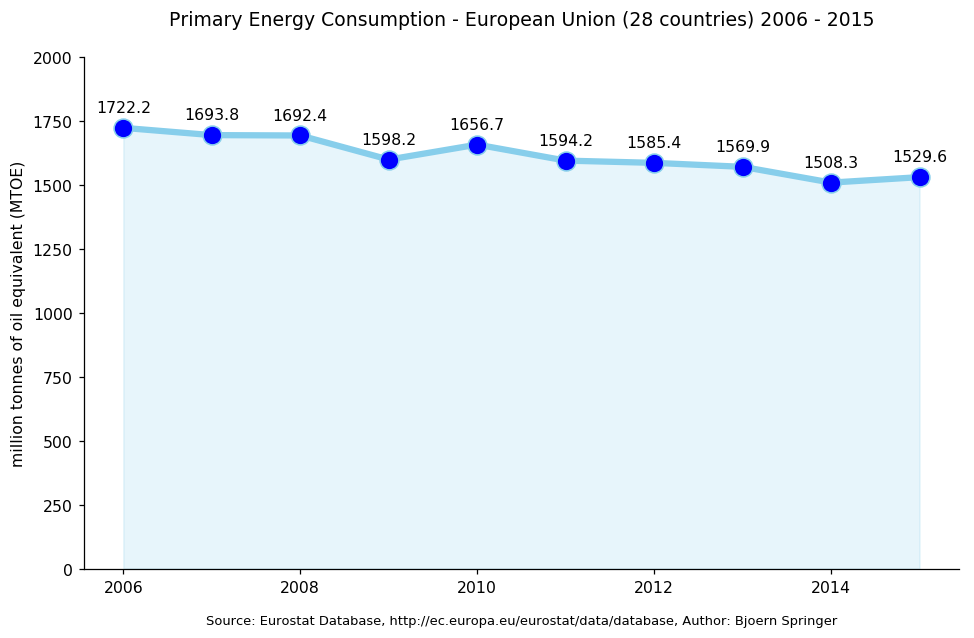

In [65]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 2000)
plt.fill_between("TIME", "Value", data=eu_energy, color="skyblue", alpha=0.2)
plt.plot("TIME", "Value", data=eu_energy, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4) 
sns.despine()

#add values to the coordinates
for index in eu_energy.index:
    time = eu_energy["TIME"].loc[index]
    value = eu_energy["Value"].loc[index]
    plt.text(time, value + 50, str(value), ha='center', va='bottom')

# Add titles, labels, text
plt.title("Primary Energy Consumption - European Union (28 countries) 2006 - 2015\n", loc='center', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
           fontsize="small")
plt.ylabel("million tonnes of oil equivalent (MTOE)")

# save as .png with less whitespace around plot
plt.savefig("primary_energy_01.png", bbox_inches="tight")

In [66]:
#make pandas dataframe called "demo", comma as thousands separator, ":" for na_values
#specify type for the numeric columns (TIME and Value)
filename = "demo_pjan_1_Data.csv"
demo = pd.read_csv(filename, encoding = "ISO-8859-1", thousands = ",", na_values=":", 
                 dtype={"TIME": np.int, "Value": np.float})

#see head
demo.head(12)

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2007,European Union (28 countries),Total,Total,Number,498300775.0,NaN
1,2007,European Union (27 countries),Total,Total,Number,493987245.0,NaN
2,2007,Euro area (19 countries),Total,Total,Number,331204579.0,NaN
3,2007,Euro area (18 countries),Total,Total,Number,327954596.0,NaN
4,2007,Belgium,Total,Total,Number,10584534.0,NaN
5,2007,Bulgaria,Total,Total,Number,7572673.0,NaN
6,2007,Czech Republic,Total,Total,Number,10254233.0,NaN
7,2007,Denmark,Total,Total,Number,5447084.0,NaN
8,2007,Germany (until 1990 former territory of the FRG),Total,Total,Number,82314906.0,NaN
9,2007,Germany including former GDR,Total,Total,Number,82314906.0,NaN


In [67]:
#get dimensions of data frame
demo.shape

(580, 7)

In [68]:
#list data type of each column, number of non-missing values, memry usage
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 7 columns):
TIME                  580 non-null int64
GEO                   580 non-null object
AGE                   580 non-null object
SEX                   580 non-null object
UNIT                  580 non-null object
Value                 542 non-null float64
Flag and Footnotes    62 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 31.8+ KB


In [69]:
#filter dataframe by means of boolean indexing/ boolean selection: european union
eu_demo_crit1 = demo.GEO == "European Union (28 countries)"
eu_demo = demo.loc[eu_demo_crit1]
eu_demo

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2007,European Union (28 countries),Total,Total,Number,498300775.0,NaN
58,2008,European Union (28 countries),Total,Total,Number,500297033.0,NaN
116,2009,European Union (28 countries),Total,Total,Number,502090235.0,NaN
174,2010,European Union (28 countries),Total,Total,Number,503170618.0,b
232,2011,European Union (28 countries),Total,Total,Number,502964837.0,b
290,2012,European Union (28 countries),Total,Total,Number,504041384.0,b
348,2013,European Union (28 countries),Total,Total,Number,505143171.0,NaN
406,2014,European Union (28 countries),Total,Total,Number,506973868.0,ep
464,2015,European Union (28 countries),Total,Total,Number,508504320.0,bep
522,2016,European Union (28 countries),Total,Total,Number,510278701.0,bep


In [70]:
#from eu_demo, only show columns: "TIME" and "value"
eu_demo_tv = eu_demo[["TIME", "Value"]]
eu_demo_tv

,TIME,Value
0,2007,498300775.0
58,2008,500297033.0
116,2009,502090235.0
174,2010,503170618.0
232,2011,502964837.0
290,2012,504041384.0
348,2013,505143171.0
406,2014,506973868.0
464,2015,508504320.0
522,2016,510278701.0


In [71]:
#from eu_energy, only show columns: "TIME" and "value"
eu_energy_tv = eu_energy[["TIME", "Value"]]
eu_energy_tv

,TIME,Value
0,2006,1722.2
492,2007,1693.8
984,2008,1692.4
1476,2009,1598.2
1968,2010,1656.7
2460,2011,1594.2
2952,2012,1585.4
3444,2013,1569.9
3936,2014,1508.3
4428,2015,1529.6


In [72]:
#merge "eu_energy_tv" and "eu_demo_tv" along the "TIME" column, only shared "TIME" values ("inner") -> 2007 - 2015
eu_pec_pc = pd.merge(eu_energy_tv, eu_demo_tv, on='TIME', how='inner', suffixes=('_energy', '_demo'))
eu_pec_pc

,TIME,Value_energy,Value_demo
0,2007,1693.8,498300775.0
1,2008,1692.4,500297033.0
2,2009,1598.2,502090235.0
3,2010,1656.7,503170618.0
4,2011,1594.2,502964837.0
5,2012,1585.4,504041384.0
6,2013,1569.9,505143171.0
7,2014,1508.3,506973868.0
8,2015,1529.6,508504320.0


In [73]:
#add column "pecpc" showing primary energy consumption per capita
eu_pec_pc["pecpc"] = eu_pec_pc["Value_energy"] / eu_pec_pc["Value_demo"] * 1000000
eu_pec_pc

,TIME,Value_energy,Value_demo,pecpc
0,2007,1693.8,498300775.0,3.399152
1,2008,1692.4,500297033.0,3.382790
2,2009,1598.2,502090235.0,3.183093
3,2010,1656.7,503170618.0,3.292521
4,2011,1594.2,502964837.0,3.169605
5,2012,1585.4,504041384.0,3.145377
6,2013,1569.9,505143171.0,3.107832
7,2014,1508.3,506973868.0,2.975104
8,2015,1529.6,508504320.0,3.008037


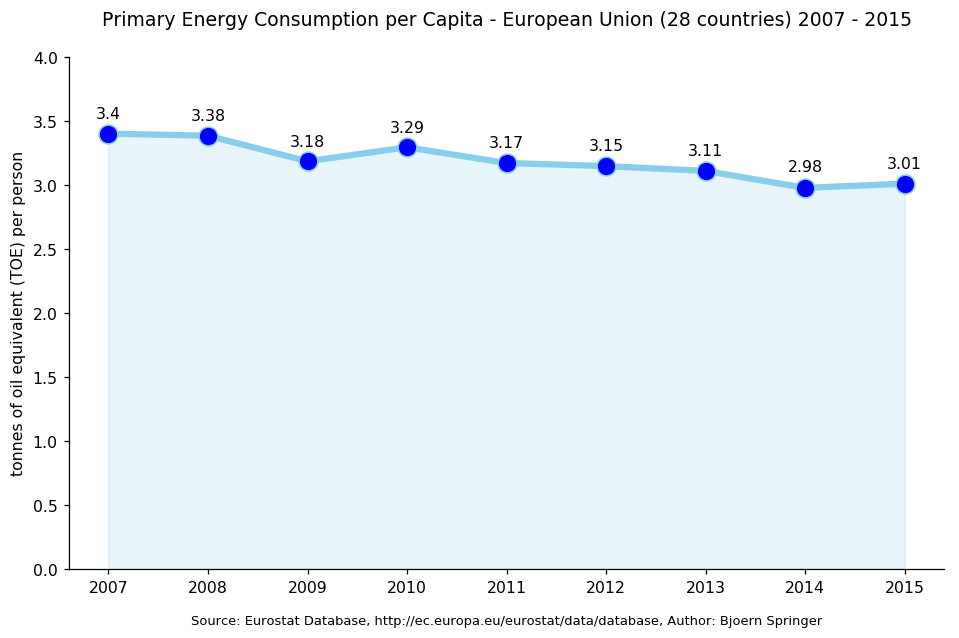

In [74]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 4)
plt.fill_between("TIME", "pecpc", data=eu_pec_pc, color="skyblue", alpha=0.2)
plt.plot("TIME", "pecpc", data=eu_pec_pc, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4) 
sns.despine()

#add values to the coordinates
for index in eu_pec_pc.index:
    time = eu_pec_pc["TIME"].loc[index]
    pecpc = round(eu_pec_pc["pecpc"].loc[index], 2)
    plt.text(time, pecpc + 0.1, str(pecpc), ha='center', va='bottom')

# Add titles, labels, text
plt.title("Primary Energy Consumption per Capita - European Union (28 countries) 2007 - 2015\n", loc='center', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
           fontsize="small")
plt.ylabel("tonnes of oil equivalent (TOE) per person")

# save as .png with less whitespace around plot
plt.savefig("primary_energy_02.png", bbox_inches="tight")

In [75]:
#filter "energy" dataframe by means of boolean indexing/ boolean selection: 
#single countries, Primary energy consumption > 0, MTOE, 2015
countries_crit1 = energy.GEO != "European Union (28 countries)"
countries_crit2 = energy.INDIC_NRG == "Primary energy consumption"
countries_crit3 = energy.UNIT == "Million tonnes of oil equivalent (TOE)"
countries_crit4 = energy.TIME == 2015
countries_crit5 = energy.GEO != "Euro area (19 countries)"
countries_crit6 = energy.Value > 0
countries_crit = countries_crit1 & countries_crit2 & countries_crit3 & countries_crit4 & countries_crit5 & countries_crit6
countries_energy = energy.loc[countries_crit]

#replace long country names, sort by value (descending)
countries_energy = countries_energy.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
    .replace('Kosovo (under United Nations Security Council Resolution 1244/99)', 'Kosovo')\
    .replace('Bosnia and Herzegovina', 'Bosnia & Herzeg.')\
    .sort_values("Value", ascending=False)
    
countries_energy

,TIME,GEO,INDIC_NRG,UNIT,Value
4500,2015,Germany,Primary energy consumption,Million tonnes of oil equivalent (TOE),292.9
4560,2015,France,Primary energy consumption,Million tonnes of oil equivalent (TOE),239.4
4776,2015,United Kingdom,Primary energy consumption,Million tonnes of oil equivalent (TOE),183.0
4584,2015,Italy,Primary energy consumption,Million tonnes of oil equivalent (TOE),149.6
4860,2015,Turkey,Primary energy consumption,Million tonnes of oil equivalent (TOE),124.9
4548,2015,Spain,Primary energy consumption,Million tonnes of oil equivalent (TOE),117.1
4692,2015,Poland,Primary energy consumption,Million tonnes of oil equivalent (TOE),90.0
4908,2015,Ukraine,Primary energy consumption,Million tonnes of oil equivalent (TOE),85.5
4668,2015,Netherlands,Primary energy consumption,Million tonnes of oil equivalent (TOE),64.3
4452,2015,Belgium,Primary energy consumption,Million tonnes of oil equivalent (TOE),45.7


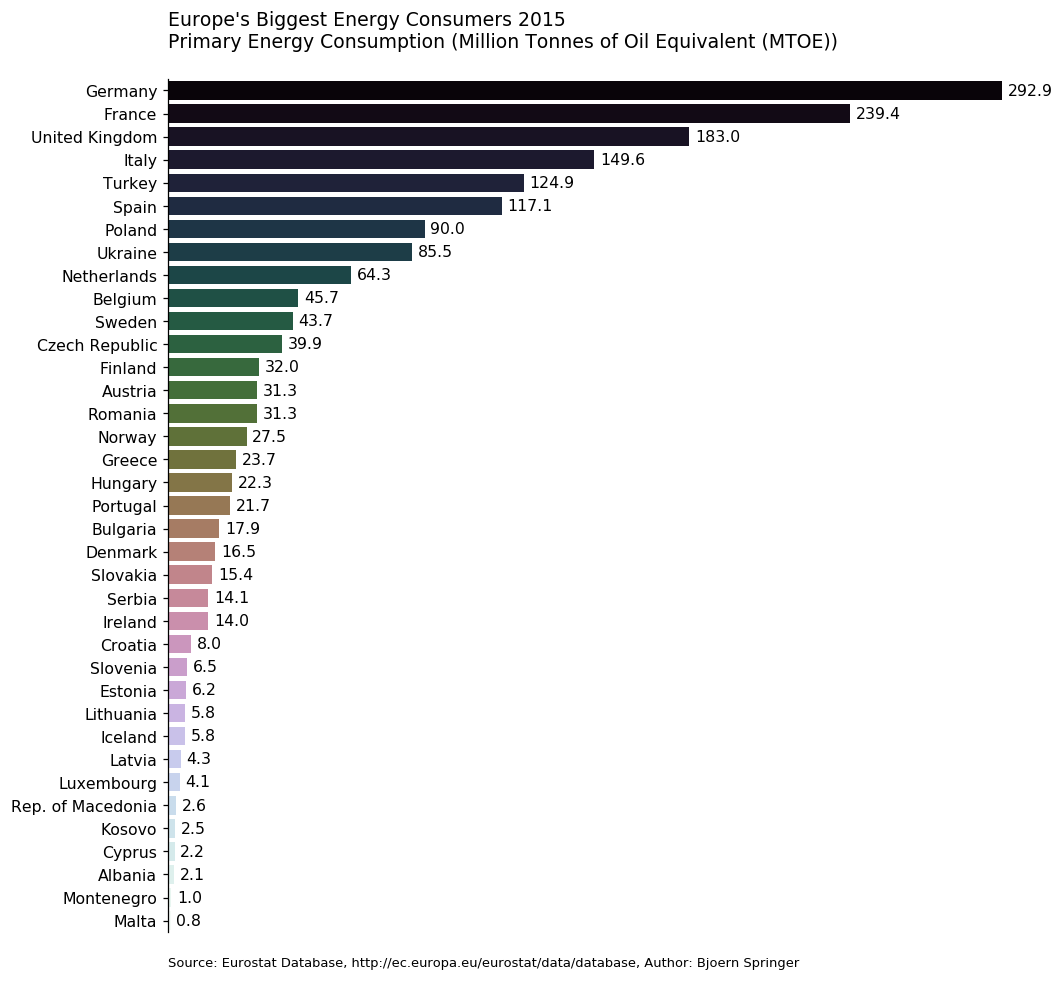

In [76]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)

#make plot
ax = sns.barplot(y=countries_energy.GEO, x=countries_energy.Value, data = countries_energy, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + 2, rect.get_y() + rect.get_height()/2, width, ha='left', va='center')

# Add titles, labels, text
plt.title("Europe's Biggest Energy Consumers 2015\nPrimary Energy Consumption (Million Tonnes of Oil Equivalent (MTOE))\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")
plt.text(0, 38,"\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
         fontsize="small")

# save as .png with less whitespace around plot
plt.savefig("primary_energy_03.png", bbox_inches="tight")

In [77]:
#filter "demo" dataframe by means of boolean indexing/ boolean selection: single countries, 2015, Value > 0
countries_demo_crit1 = ~ demo['GEO'].str.contains("Euro", na=False)
countries_demo_crit2 = demo.TIME == 2015
countries_demo_crit3 = demo.Value > 0
countries_demo_crit = countries_demo_crit1 & countries_demo_crit2 & countries_demo_crit3
countries_demo = demo.loc[countries_demo_crit]

#replace long country names (as used in countries_energy), sort by value (descending)
countries_demo = countries_demo.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
    .replace('Kosovo (under United Nations Security Council Resolution 1244/99)', 'Kosovo')\
    .replace('Bosnia and Herzegovina', 'Bosnia & Herzeg.')\
    .sort_values("Value", ascending=False)
    
countries_demo

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
472,2015,Germany,Total,Total,Number,81197537.0,NaN
473,2015,Germany including former GDR,Total,Total,Number,81197537.0,NaN
509,2015,Turkey,Total,Total,Number,77695904.0,NaN
478,2015,France,Total,Total,Number,66488186.0,b
497,2015,United Kingdom,Total,Total,Number,64875165.0,e
481,2015,Italy,Total,Total,Number,60795612.0,NaN
477,2015,Spain,Total,Total,Number,46449565.0,NaN
518,2015,Ukraine,Total,Total,Number,42759661.0,b
490,2015,Poland,Total,Total,Number,38005614.0,NaN
492,2015,Romania,Total,Total,Number,19870647.0,e


In [78]:
#from countries_demo, only show columns: "GEO" and "value"
countries_demo_gv = countries_demo[["GEO", "Value"]]
countries_demo_gv

,GEO,Value
472,Germany,81197537.0
473,Germany including former GDR,81197537.0
509,Turkey,77695904.0
478,France,66488186.0
497,United Kingdom,64875165.0
481,Italy,60795612.0
477,Spain,46449565.0
518,Ukraine,42759661.0
490,Poland,38005614.0
492,Romania,19870647.0


In [79]:
#from countries_energy, only show columns: "GEO" and "value"
countries_energy_gv = countries_energy[["GEO", "Value"]]
countries_energy_gv

,GEO,Value
4500,Germany,292.9
4560,France,239.4
4776,United Kingdom,183.0
4584,Italy,149.6
4860,Turkey,124.9
4548,Spain,117.1
4692,Poland,90.0
4908,Ukraine,85.5
4668,Netherlands,64.3
4452,Belgium,45.7


In [80]:
#merge "countries_energy_gv" and "countries_demo_gv" along the "GEO" column, only shared "GEO" values ("inner")
countries_pec_pc = pd.merge(countries_energy_gv, countries_demo_gv, on='GEO', how='inner', suffixes=('_energy', '_demo'))
countries_pec_pc

,GEO,Value_energy,Value_demo
0,Germany,292.9,81197537.0
1,France,239.4,66488186.0
2,United Kingdom,183.0,64875165.0
3,Italy,149.6,60795612.0
4,Turkey,124.9,77695904.0
5,Spain,117.1,46449565.0
6,Poland,90.0,38005614.0
7,Ukraine,85.5,42759661.0
8,Netherlands,64.3,16900726.0
9,Belgium,45.7,11237274.0


In [81]:
#add column "pecpc" showing primary energy consumption per capita
countries_pec_pc["pecpc"] = countries_pec_pc["Value_energy"] / countries_pec_pc["Value_demo"] * 1000000
countries_pec_pc = countries_pec_pc.sort_values("pecpc", ascending=False)
countries_pec_pc

,GEO,Value_energy,Value_demo,pecpc
28,Iceland,5.8,329100.0,17.623823
30,Luxembourg,4.1,562958.0,7.282959
12,Finland,32.0,5471753.0,5.848217
15,Norway,27.5,5166493.0,5.322760
26,Estonia,6.2,1314870.0,4.715295
10,Sweden,43.7,9747355.0,4.483268
9,Belgium,45.7,11237274.0,4.066823
8,Netherlands,64.3,16900726.0,3.804570
11,Czech Republic,39.9,10538275.0,3.786198
13,Austria,31.3,8576261.0,3.649609


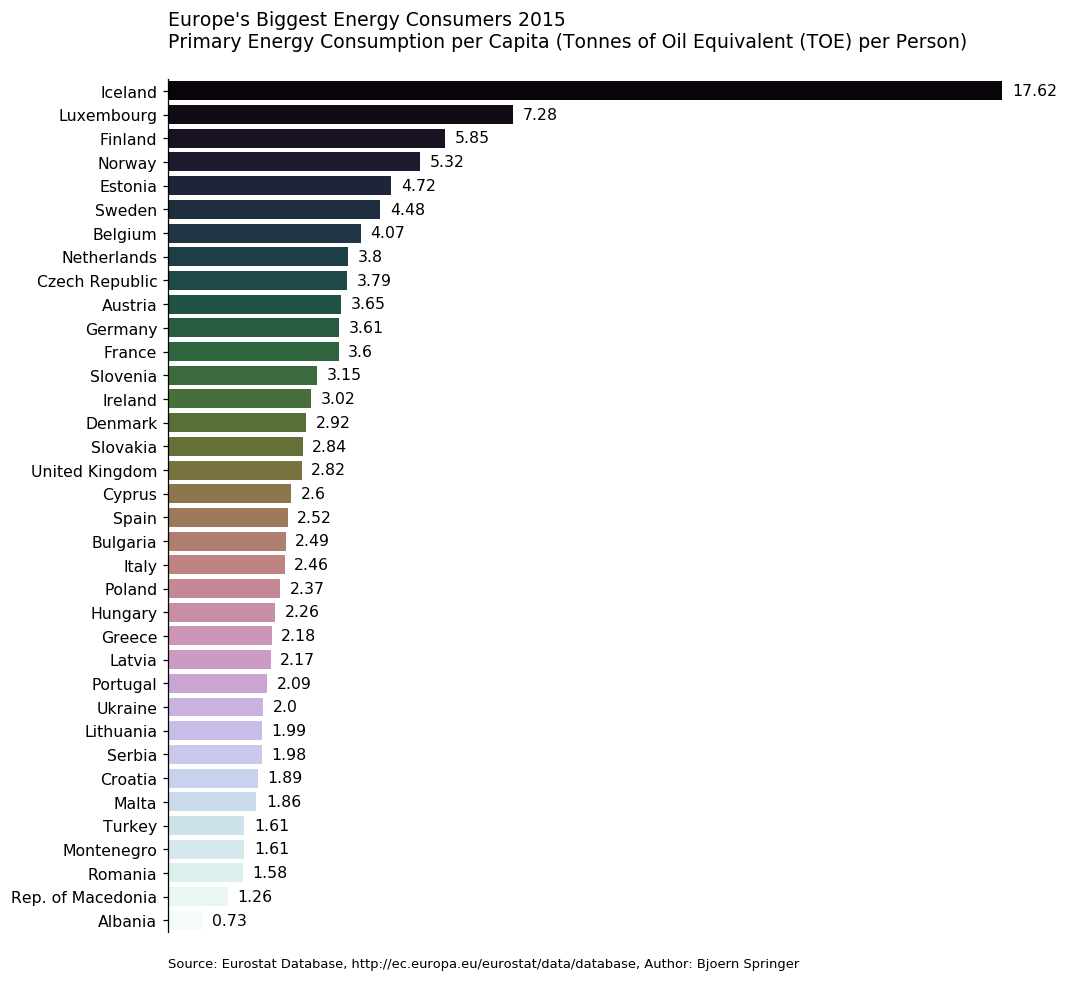

In [82]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)

#make plot
ax = sns.barplot(y=countries_pec_pc.GEO, x=countries_pec_pc.pecpc, data = countries_pec_pc, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + .2, rect.get_y() + rect.get_height()/2, round(width, 2), ha='left', va='center')

# Add titles, labels, text
plt.title("Europe's Biggest Energy Consumers 2015\nPrimary Energy Consumption per Capita (Tonnes of Oil Equivalent (TOE) per Person)\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")
plt.text(0, 37,"\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
         fontsize="small")

# save as .png with less whitespace around plot
plt.savefig("primary_energy_04.png", bbox_inches="tight")